In [1]:
import pandas as pd

In [2]:
# Define variables to access a specific CT slice
file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Datasets/PET Lung - Nodules (main Dataset)/manifest-1608669183333/metadata.xlsx"
sheet_name = "in"
column_name = "Subject ID"

In [ ]:
# Print all the unique Patient names based on the Metadata File 
try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    unique_values = df[column_name].unique()
    print(unique_values)
except Exception as e:
    print(e)

['Lung_Dx-A0002' 'Lung_Dx-A0001' 'Lung_Dx-A0003' 'Lung_Dx-A0004'
 'Lung_Dx-A0005' 'Lung_Dx-A0006' 'Lung_Dx-A0007' 'Lung_Dx-A0008'
 'Lung_Dx-A0009' 'Lung_Dx-A0010' 'Lung_Dx-A0011' 'Lung_Dx-A0012'
 'Lung_Dx-A0013' 'Lung_Dx-A0014' 'Lung_Dx-A0015' 'Lung_Dx-A0016'
 'Lung_Dx-A0017' 'Lung_Dx-A0018' 'Lung_Dx-A0019' 'Lung_Dx-A0020'
 'Lung_Dx-A0021' 'Lung_Dx-A0022' 'Lung_Dx-A0023' 'Lung_Dx-A0024'
 'Lung_Dx-A0025' 'Lung_Dx-A0026' 'Lung_Dx-A0027' 'Lung_Dx-A0029'
 'Lung_Dx-A0028' 'Lung_Dx-A0030' 'Lung_Dx-A0031' 'Lung_Dx-A0032'
 'Lung_Dx-A0033' 'Lung_Dx-A0034' 'Lung_Dx-A0035' 'Lung_Dx-A0036'
 'Lung_Dx-A0038' 'Lung_Dx-A0037' 'Lung_Dx-A0039' 'Lung_Dx-A0040'
 'Lung_Dx-A0041' 'Lung_Dx-A0042' 'Lung_Dx-A0043' 'Lung_Dx-A0044'
 'Lung_Dx-A0045' 'Lung_Dx-A0046' 'Lung_Dx-A0047' 'Lung_Dx-A0048'
 'Lung_Dx-A0049' 'Lung_Dx-A0050' 'Lung_Dx-A0051' 'Lung_Dx-A0052'
 'Lung_Dx-A0053' 'Lung_Dx-A0054' 'Lung_Dx-A0055' 'Lung_Dx-A0056'
 'Lung_Dx-A0057' 'Lung_Dx-A0059' 'Lung_Dx-A0058' 'Lung_Dx-A0061'
 'Lung_Dx-A0062' 'Lung_Dx

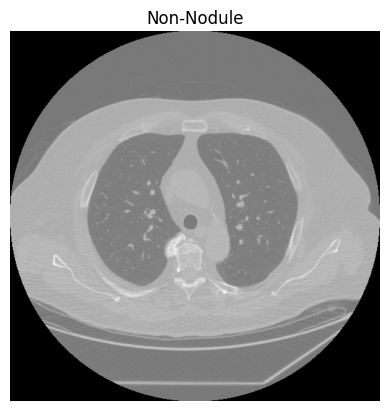

In [ ]:
# Visualize a Single CT Slice
import pydicom
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_file_path = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Display the DICOM image
plt.imshow(pixel_array, cmap='gray') 
plt.title("Non-Nodule")
plt.axis("off")
plt.show()

(512, 512, 3)


C:\Users\domin\AppData\Local\Temp\ipykernel_16112\1539995573.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('plasma')  # Choose a colormap


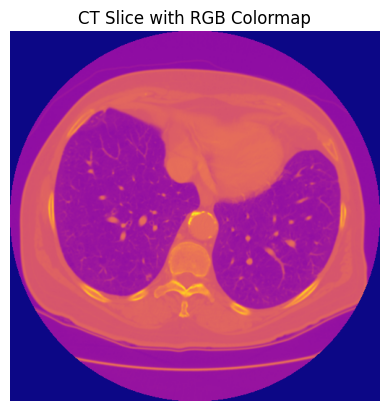

In [ ]:
# Visualize the CT image in RGB Values
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Datasets/LIDC-IDRI (including healthy patients)/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0006/01-01-2000-NA-NA-92500/3000556.000000-NA-20957/1-079.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Normalize pixel values to [0, 1]
pixel_array_normalized = (pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array))

# Apply a colormap to create an RGB image 
cmap = get_cmap('plasma') 
rgb_image = cmap(pixel_array_normalized)  # Returns an (H, W, 4) array (RGBA)

# Drop the alpha channel (optional) to get an RGB image
rgb_image = (rgb_image[:, :, :3] * 255).astype(np.uint8) 
print(rgb_image.shape)
plt.imshow(rgb_image)
plt.title("CT Slice with RGB Colormap")
plt.axis("off")
plt.show()

torch.Size([512, 512])


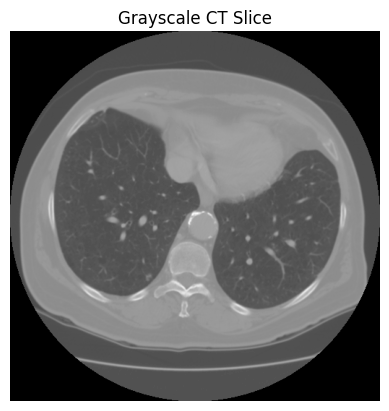

In [ ]:
# Create a pseudo Grayscale Conversion Process (Artificially created RGB values, as CT images are already in Grayscale Format)
import pydicom
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Datasets/LIDC-IDRI (including healthy patients)/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0006/01-01-2000-NA-NA-92500/3000556.000000-NA-20957/1-079.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the pixel data to a PyTorch tensor
image_tensor = torch.tensor(pixel_array, dtype=torch.float32)

# Normalize the tensor to [0, 1]
image_tensor_normalized = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())

# Add a channel dimension to simulate a grayscale image with a single channel
image_tensor_normalized = image_tensor_normalized.unsqueeze(0) 

# Convert to pseudo-RGB by repeating the channel 3 times
image_rgb = image_tensor_normalized.repeat(3, 1, 1) 

# Define the Grayscale transform
grayscale_transform = T.Grayscale(num_output_channels=1)

# Apply the Grayscale transform
image_grayscale = grayscale_transform(image_rgb)  

# Squeeze the channel dimension for visualization
image_grayscale_squeezed = image_grayscale.squeeze(0)
print(image_grayscale_squeezed.shape)
plt.imshow(image_grayscale_squeezed.numpy(), cmap='gray')
plt.title("Grayscale CT Slice")
plt.axis("off")
plt.show()

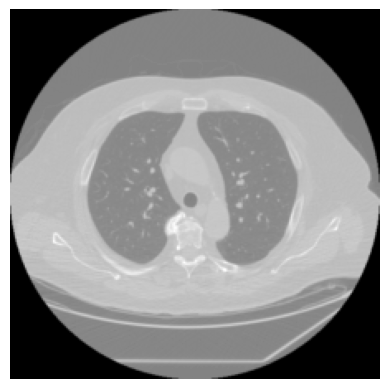

In [ ]:
# Resizing Process for the Image
import pydicom
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the pixel data to a PyTorch tensor
image_tensor = torch.tensor(pixel_array, dtype=torch.float32)

# Normalize the tensor to range [0, 1]
image_tensor_normalized = (image_tensor - torch.min(image_tensor)) / (torch.max(image_tensor) - torch.min(image_tensor))

# Add a channel dimension to make it compatible with PyTorch transforms
image_tensor_normalized = image_tensor_normalized.unsqueeze(0)

# Define the resize transformation
resize_transform = transforms.Resize((224, 224)) 
image_resized = resize_transform(image_tensor_normalized.unsqueeze(0)) 

# Remove the batch and channel dimensions for visualization
image_resized = image_resized.squeeze().numpy()  
# Display the resized image
plt.imshow(image_resized, cmap='gray')
# plt.title("CT Slice 224x224 Pixel")
plt.axis("off")
plt.show()


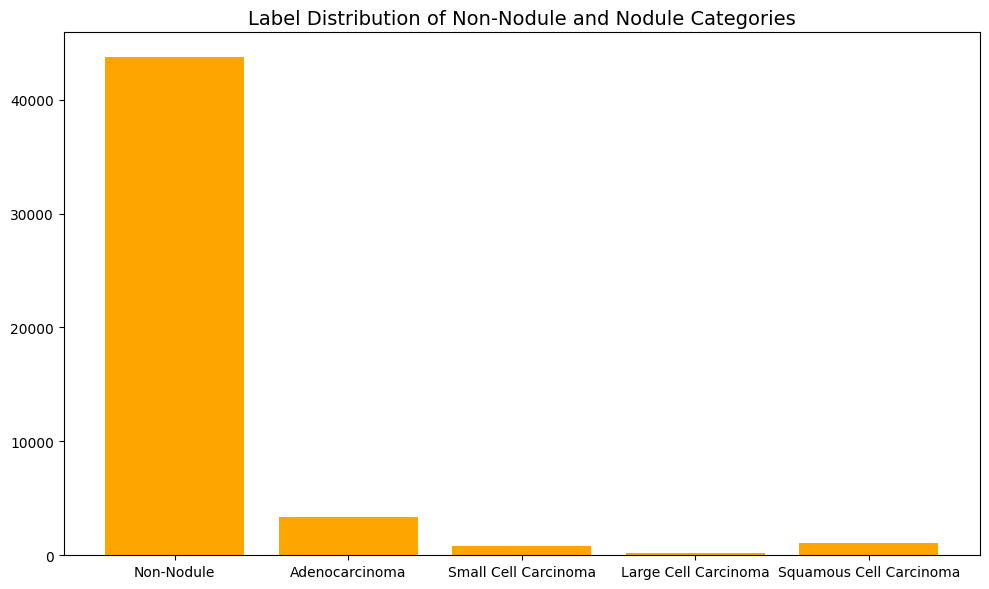

In [ ]:
# Create a Bar Chart for the Label Distribution
import matplotlib.pyplot as plt

categories = {
    "Non-Nodule": 43719,
    "Nodule": {
        "Adenocarcinoma": 3357,
        "Small Cell Carcinoma": 837,
        "Large Cell Carcinoma": 201,
        "Squamous Cell Carcinoma": 1098
    }
}

# Prepare data for the bar chart
main_categories = ["Non-Nodule"] + list(categories["Nodule"].keys())
values = [categories["Non-Nodule"]] + list(categories["Nodule"].values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(main_categories, values, color='orange')

plt.title("Label Distribution of Non-Nodule and Nodule Categories", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

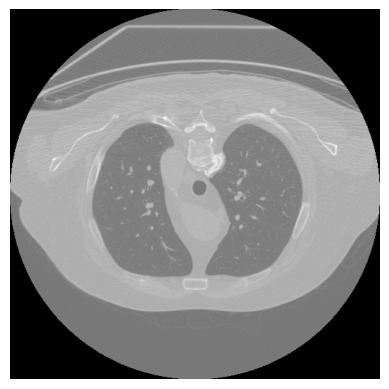

In [ ]:
# Visualization for the Rotation Data Augmentation Technique
import pydicom
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the NumPy array to a PyTorch tensor
tensor = torch.tensor(pixel_array).unsqueeze(0).unsqueeze(0).float() 

rotation = transforms.RandomRotation() 
flipped_tensor = rotation(tensor)

# Remove batch and channel dimensions
flipped_tensor = flipped_tensor.squeeze().numpy()

# Display the horizontally flipped DICOM image
plt.imshow(flipped_tensor, cmap='gray') 
plt.axis("off") 
plt.show()


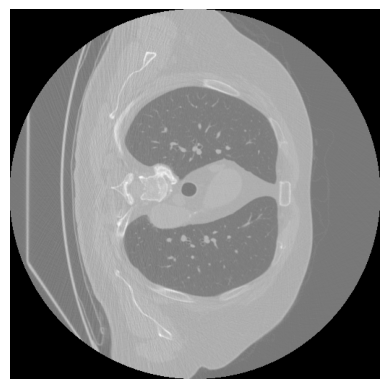

In [ ]:
# Visualization for the Rotation Augmentation Technique
import pydicom
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the NumPy array to a PyTorch tensor
tensor = torch.tensor(pixel_array).unsqueeze(0).unsqueeze(0).float()

# Define the rotation transformation (90 degrees)
rotate_90 = transforms.RandomRotation(degrees=[270, 270]) 
rotated_tensor = rotate_90(tensor)
rotated_image = rotated_tensor.squeeze().numpy()

# Display the rotated DICOM image
plt.imshow(rotated_image, cmap='gray') 
plt.axis("off")  
plt.show()

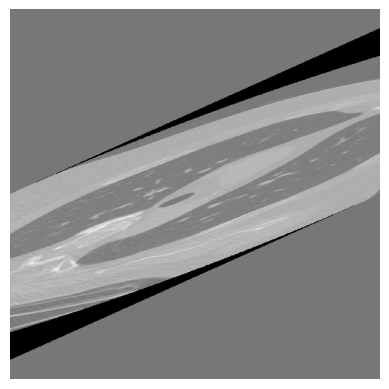

In [ ]:
# Visualization for the Shearing Augmentation Technique
import pydicom
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the NumPy array to a PyTorch tensor
tensor = torch.tensor(pixel_array).unsqueeze(0).unsqueeze(0).float() 

# Define the shear transformation
shear_transform = transforms.RandomAffine(
    degrees=0,   
    shear=[0, 180] 
)
sheared_tensor = shear_transform(tensor)
sheared_image = sheared_tensor.squeeze().numpy()

# Display the sheared DICOM image
plt.imshow(sheared_image, cmap='gray')
plt.axis("off")  
plt.show()


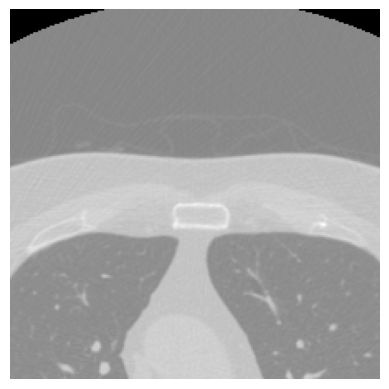

In [ ]:
# Visualization for the Cropping Augmentation Technique
import pydicom
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Load the DICOM file
dicom_file_path = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten/non-nodule/N0564_1-154.dcm"
ds = pydicom.dcmread(dicom_file_path)

# Extract the pixel data
pixel_array = ds.pixel_array

# Convert the NumPy array to a PyTorch tensor
tensor = torch.tensor(pixel_array).unsqueeze(0).unsqueeze(0).float() 

random_crop = transforms.RandomCrop(size=(224, 224))
cropped_tensor = random_crop(tensor)
cropped_image = cropped_tensor.squeeze().numpy()

# Display the randomly cropped DICOM image
plt.imshow(cropped_image, cmap='gray') 
plt.axis("off")  
plt.show()


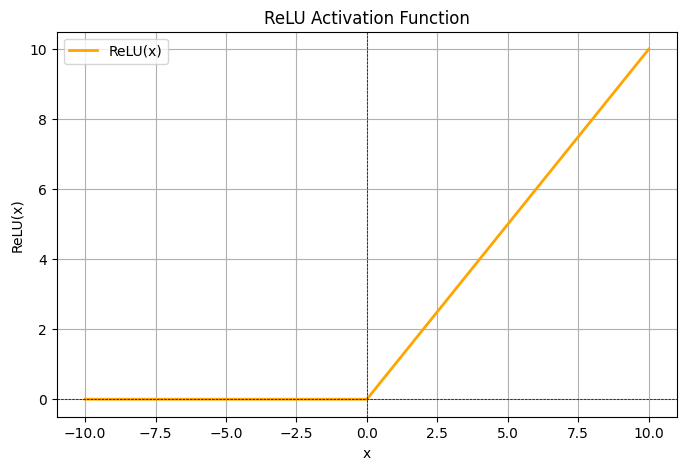

In [ ]:
# Visualization of the ReLU Activasion function
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

x_values = np.linspace(-10, 10, 400)
y_values = relu(x_values)

# Plot the ReLU function
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="ReLU(x)", color='orange', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Activation Function")
plt.legend()
plt.grid(True)
plt.show()

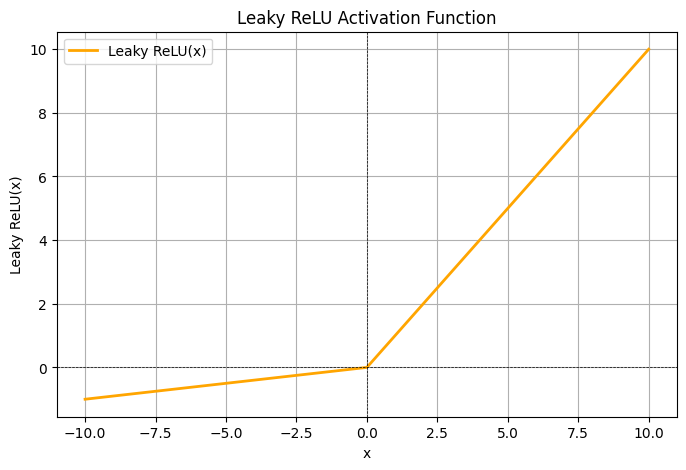

In [4]:
# Visualization of the Leaky ReLU Activasion function
import numpy as np
import matplotlib.pyplot as plt

# Define the Leaky ReLU function
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

x_values = np.linspace(-10, 10, 400)
y_values = leaky_relu(x_values)

# Plot the Leaky ReLU function
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Leaky ReLU(x)", color='orange', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("x")
plt.ylabel("Leaky ReLU(x)")
plt.title("Leaky ReLU Activation Function")
plt.legend()
plt.grid(True)
plt.show()